In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import pandas as pd
import numpy as np
import datetime
import pytz
import os
import glob
import sys
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa import stattools
from scipy.signal import savgol_filter

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context('notebook', font_scale=1.5,rc={"lines.linewidth": 2.5})
sns.set_palette(sns.color_palette("Paired"))

### Setup and Load Data

In [3]:
#Please change to the location of the git_hub reporsitory
os.chdir('/Users/nehrend/work/algo_trading_book/')

### Pairs Trading

In [101]:
rd_shell = pd.read_csv('./datasets/RDShell.CSV',parse_dates=True, index_col='Date')
rd_shell.head(3)

,RD,Shell,parity,deviation
Date,,,,
1989-01-03,14.28125,12.041667,1.185986,0.019319
1989-01-04,14.34375,12.166667,1.178938,0.012272
1989-01-05,14.31250,12.083333,1.184483,0.017816


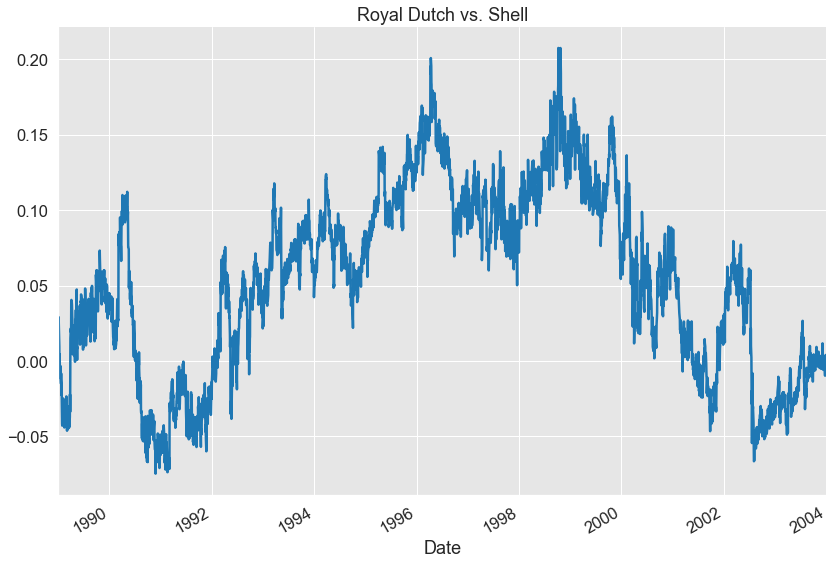

In [80]:
fig,ax = plt.subplots(figsize=(12,8))
_ = rd_shell.deviation.plot(color='C1')
sns.despine()
plt.tight_layout()
plt.savefig('./book/chapters/chapter_stat_ts/figures/rd_shell.png', format='png', dpi=300)
plt.title('Royal Dutch vs. Shell')
plt.show()

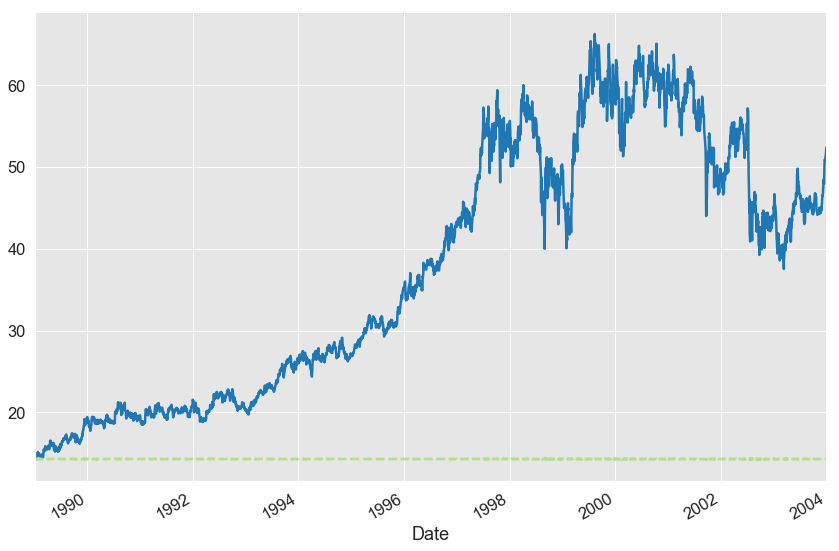

In [112]:
rd_shell = rd_shell.assign(Shell_rescaled = rd_shell.RD[0] + rd_shell.Shell.pct_change().dropna() )
fig,ax = plt.subplots(figsize=(12,8))
_ = rd_shell['RD'].plot(color='C1',linestyle='-')
_ = rd_shell['Shell_rescaled'].plot(color='C2',linestyle='--')
sns.despine()
plt.tight_layout()
#plt.savefig('./book/chapters/chapter_stat_ts/figures/rd_shell.png', format='png', dpi=300)
#plt.title('Royal Dutch vs. Shell')
plt.show()

In [113]:
rd_shell.RD[0] + rd_shell.Shell.pct_change().dropna()

Date
1989-01-06    14.298707
1989-01-09    14.326486
1989-01-10    14.312500
1989-01-11    14.322845
1989-01-12    14.336391
1989-01-13    14.312500
1989-01-16    14.322500
1989-01-17    14.315800
1989-01-18    14.315789
1989-01-19    14.305943
1989-01-20    14.335602
1989-01-23    14.312500
1989-01-24    14.325403
1989-01-25    14.302946
1989-01-26    14.322146
1989-01-27    14.306131
1989-01-30    14.334936
1989-01-31    14.309365
1989-02-01    14.303066
1989-02-02    14.309325
1989-02-03    14.312500
1989-02-06    14.299761
1989-02-07    14.328629
1989-02-08    14.302976
1989-02-09    14.315705
1989-02-10    14.296526
1989-02-13    14.309253
1989-02-14    14.328787
1989-02-15    14.322115
1989-02-16    14.309325
                ...    
2003-11-18    14.302839
2003-11-19    14.321991
2003-11-20    14.310150
2003-11-21    14.307526
2003-11-24    14.325391
2003-11-25    14.309903
2003-11-26    14.320052
2003-11-28    14.311466
2003-12-01    14.325695
2003-12-02    14.316330
2003-12-03 

In [114]:
df = pd.read_csv('./datasets/UNPLC-UNNV.csv',parse_dates=True,index_col='Date')

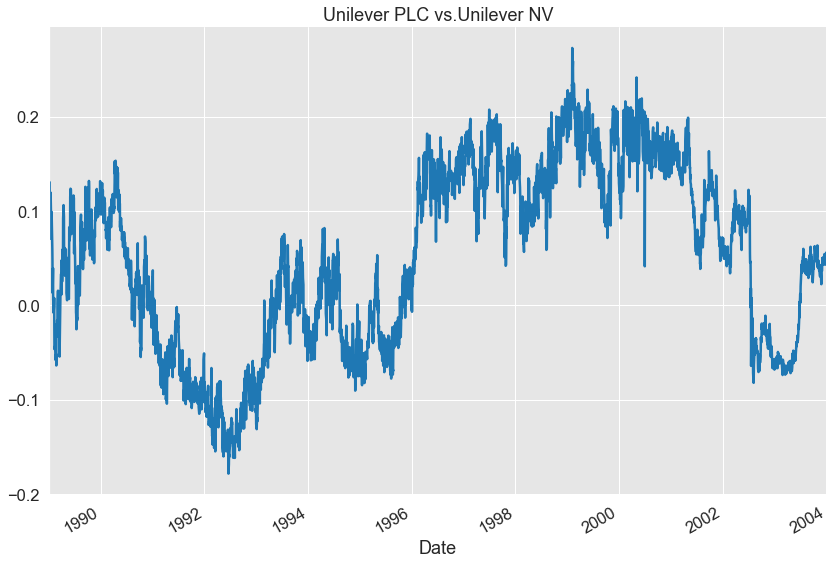

In [78]:
fig,ax = plt.subplots(figsize=(12,8))
_ = df.deviation.plot(color='C1')
sns.despine()
plt.tight_layout()
plt.savefig('./book/chapters/chapter_stat_ts/figures/rd_un.png', format='png', dpi=300)
plt.title('Unilever PLC vs.Unilever NV')
plt.show()

In [10]:
df = pd.read_csv('./datasets/WIPRO.csv',index_col='Date',parse_dates=True)
df = df.loc[:,['ExchangeRate','VU','VI','CU','CI']]
df.head(3)

,ExchangeRate,VU,VI,CU,CI
Date,,,,,
2005-04-04,0.022944,476700,62494.8672,20.86003,15.471116
2005-04-05,0.022868,437500,22952.6116,18.75001,14.428542
2005-04-08,0.022873,504700,24961.3049,19.95001,16.733864


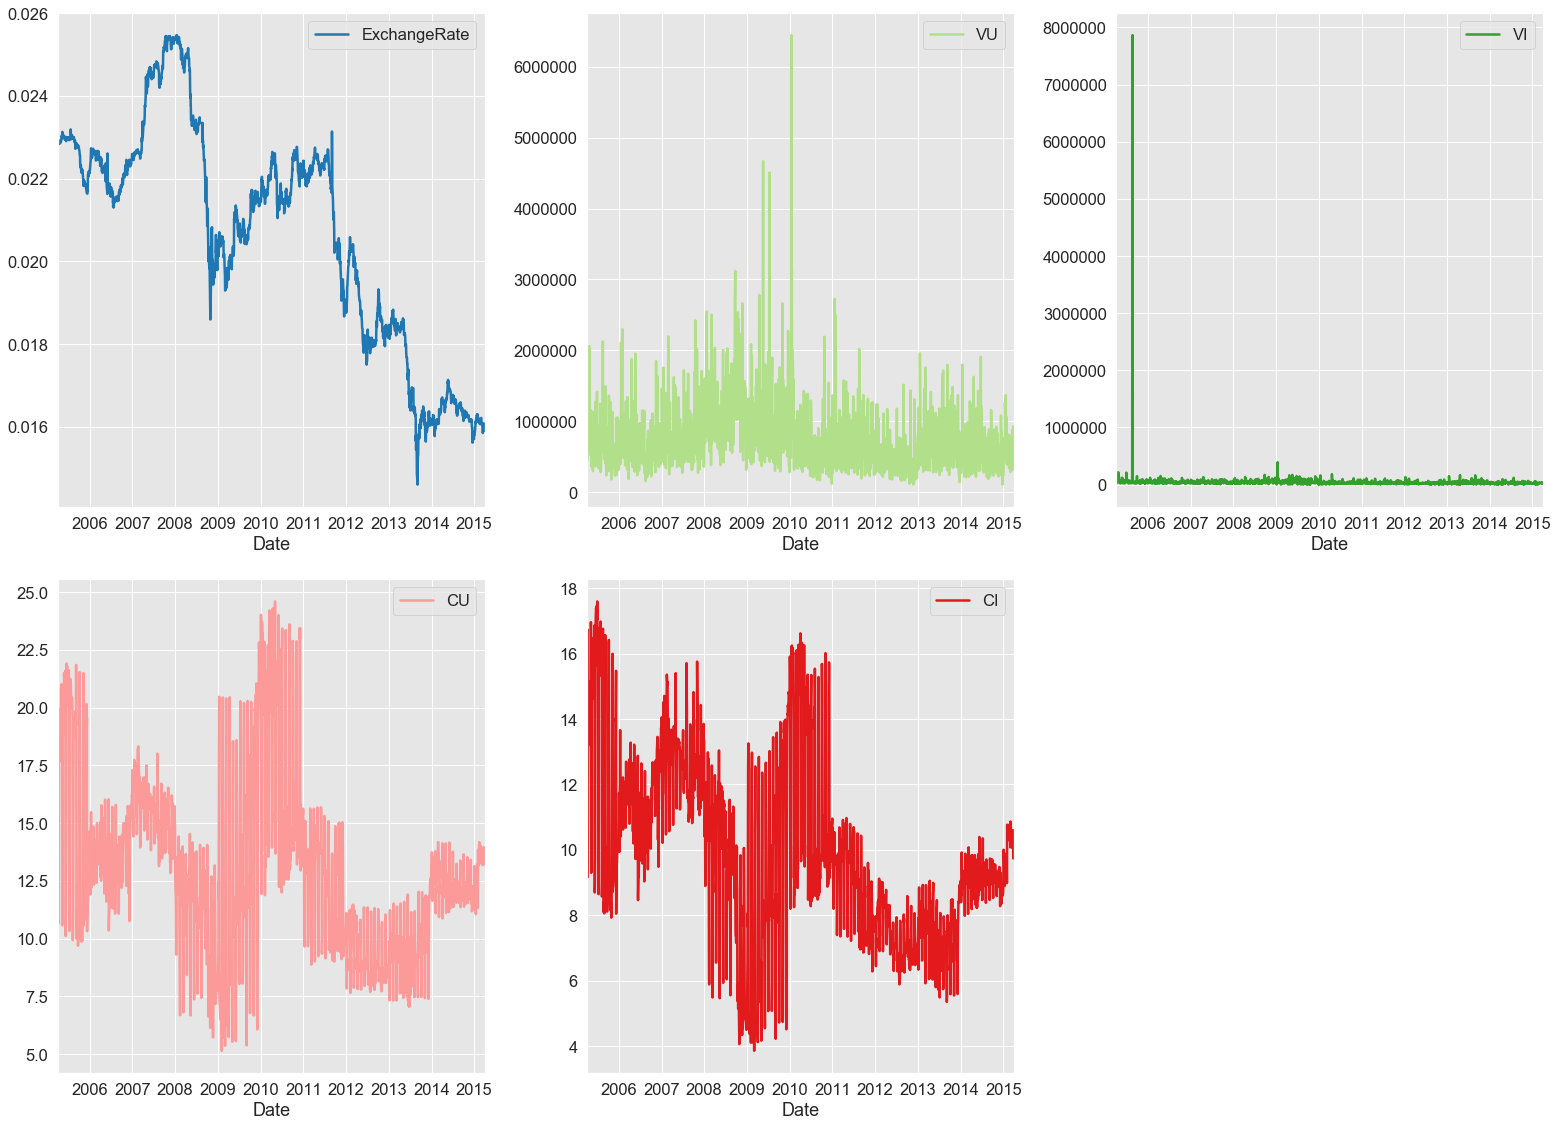

In [40]:
#xticks = [ str(x)[-2:] for x in df.index.year.values]
fig,ax = plt.subplots(2,3,figsize=(22,16),sharex=False)
_ = df.plot(subplots=True,ax=ax.reshape(6)[:5],color=['C1','C2','C3','C4','C5'])
_ = ax[1,2].set_visible(False)
plt.tight_layout()
plt.show()

In [35]:
xticks

['05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',